#### Loading the Dataset 

In [212]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn import metrics

In [168]:
data=pd.read_csv(r'/home/calcifer/Desktop/xtream/diamonds.csv')
print("Dataset shape is {}".format(df.shape))

Dataset shape is (5000, 10)


In [169]:
data.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18


The dataset is composed of 5000 entries, numbers of diamonds, and 10 columns, attributes of the diamonds.

#### Data preprocessing
Data Cleaning 

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    5000 non-null   float64
 1   cut      5000 non-null   object 
 2   color    5000 non-null   object 
 3   clarity  5000 non-null   object 
 4   depth    5000 non-null   float64
 5   table    5000 non-null   float64
 6   price    5000 non-null   int64  
 7   x        5000 non-null   float64
 8   y        5000 non-null   float64
 9   z        5000 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 390.8+ KB


In [171]:
data.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


Some diamonds have a price value that is negative and some diamonds have min value for the three dimensions x,y,z that is equal to zero, that means that the diamonid is 0D,1D or 2D. We filter these points that are incorrect.

In [172]:
ind=data[data["price"]==0].index
ind

Int64Index([], dtype='int64')

In [173]:
ind=data[data["price"]==-1].index
ind

Int64Index([331, 2121, 2484, 2933, 3155, 3317, 3445, 3904, 3980, 4188], dtype='int64')

In [174]:
print(df.loc[ind])

      carat        cut color clarity  depth  table  price     x     y     z
331    1.00       Good     F     SI1   64.1   60.0     -1  6.25  6.19  3.99
2121   0.34      Ideal     E     VS2   59.8   56.0     -1  4.55  4.54  2.72
2484   1.75      Ideal     J     SI1   63.3   59.0     -1  7.63  7.57  4.81
2933   1.51      Ideal     H     VS2   62.5   55.0     -1  7.29  7.34  4.57
3155   0.31      Ideal     G     VS2   61.7   57.0     -1  4.33  4.36  2.68
3317   1.02    Premium     D     VS2   59.8   61.0     -1  6.61  6.54  3.93
3445   0.30    Premium     H     SI1   59.3   59.0     -1  4.38  4.36  2.59
3904   0.90  Very Good     G     SI2   64.2   56.0     -1  6.04  6.11  3.90
3980   0.41  Very Good     H     VS2   63.4   58.0     -1  4.77  4.66  2.99
4188   0.79      Ideal     H    VVS1   62.0   56.0     -1  5.92  5.96  3.68


In [175]:
data = data.drop(data[data["price"]==-1].index)
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(4989, 10)

After the data cleaning we have 4989 data points.

##### Diamond Price Distribution 

count     4989.000000
mean      3930.581880
std       3970.923311
min        351.000000
25%        942.000000
50%       2398.000000
75%       5376.000000
max      18787.000000
Name: price, dtype: float64


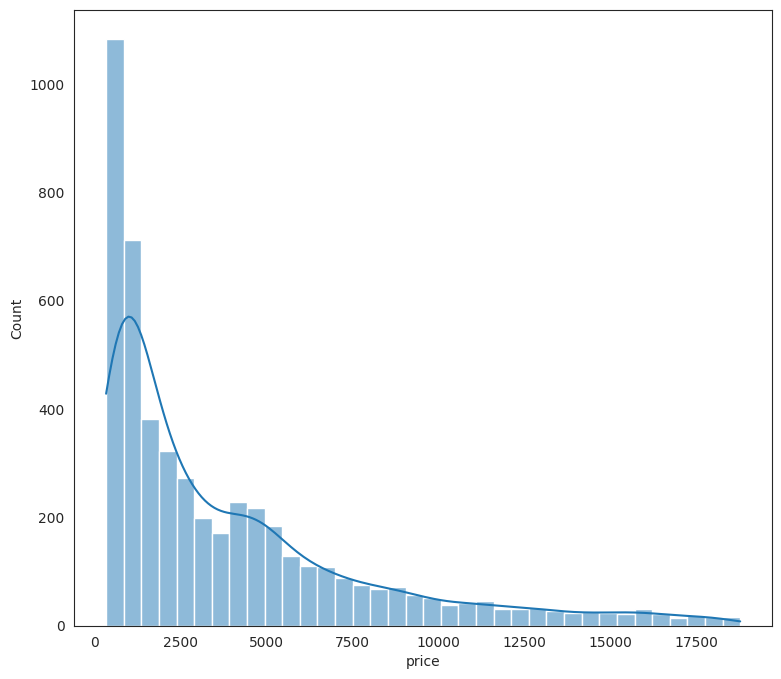

In [176]:
print(data['price'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(data['price'],kde=True);

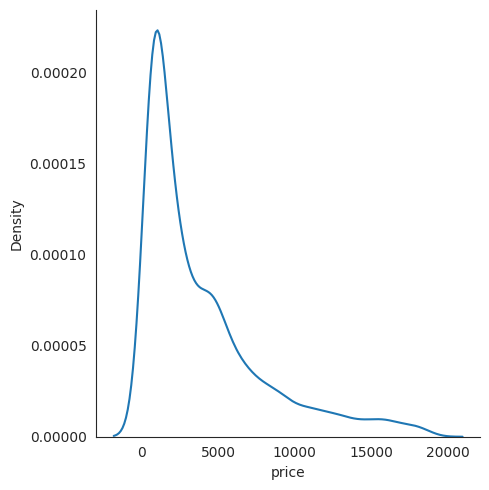

In [177]:
sns.displot(data["price"], kind="kde")

##### Numerical Data Distribution 

We want to take a look at how the numerical features are distributed. We list all the types of data from our dataset and we select only the numerical ones.

In [178]:
list(set(data.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [179]:
df_numerical = data.select_dtypes(include = ['float64', 'int64'])
df_numerical.head()

,carat,depth,table,price,x,y,z
0,1.10,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,61.7,57.0,4493,6.17,6.21,3.82


In [180]:
df_numerical=df_numerical.drop(['price'],axis=1)

Then we plot the distribution of the numerical features.

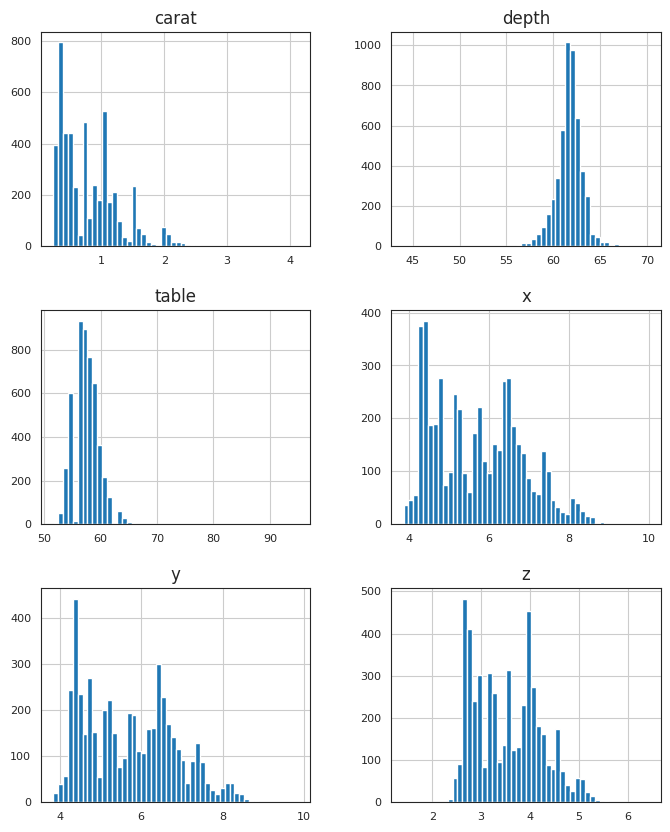

In [181]:
df_numerical.hist(figsize=(8, 10), bins=50, xlabelsize=8, ylabelsize=8);

In [182]:
df_numerical.shape

(4989, 6)

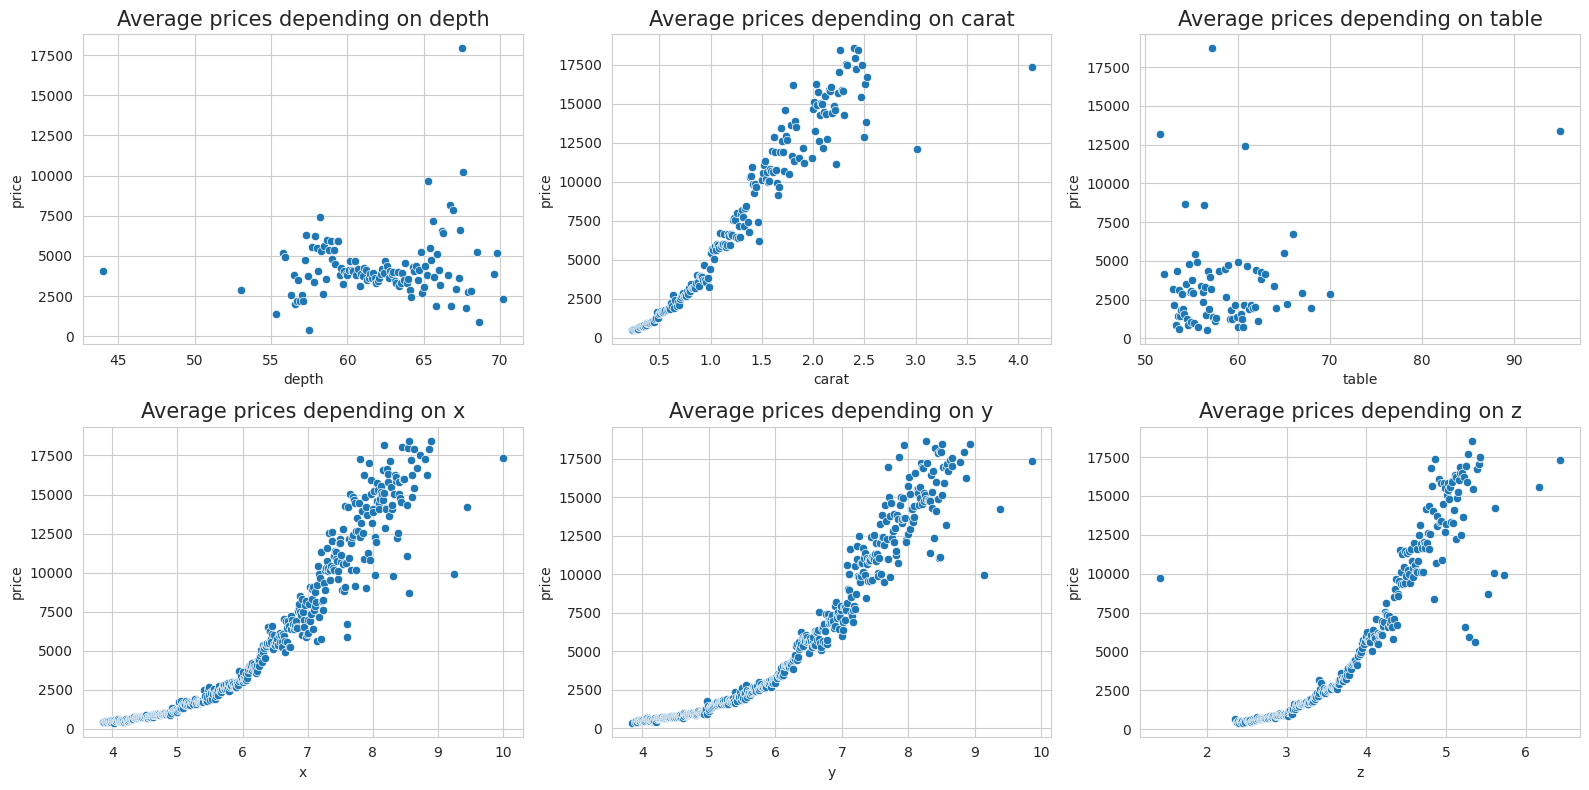

In [183]:
feat = ['depth', 'carat', 'table','x','y','z']

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))  # 2 rows, 3 columns

# Iterate over each attribute 
for i, x_var in enumerate(feat):
    row_index = i // 3
    col_index = i % 3
    
    df_temp = data.groupby([x_var])['price'].mean().reset_index()
    
    sns.scatterplot(x=x_var, y="price", data=df_temp, ax=axes[row_index, col_index])
    
    axes[row_index, col_index].set_title(f"Average prices depending on {x_var}", fontsize=15)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

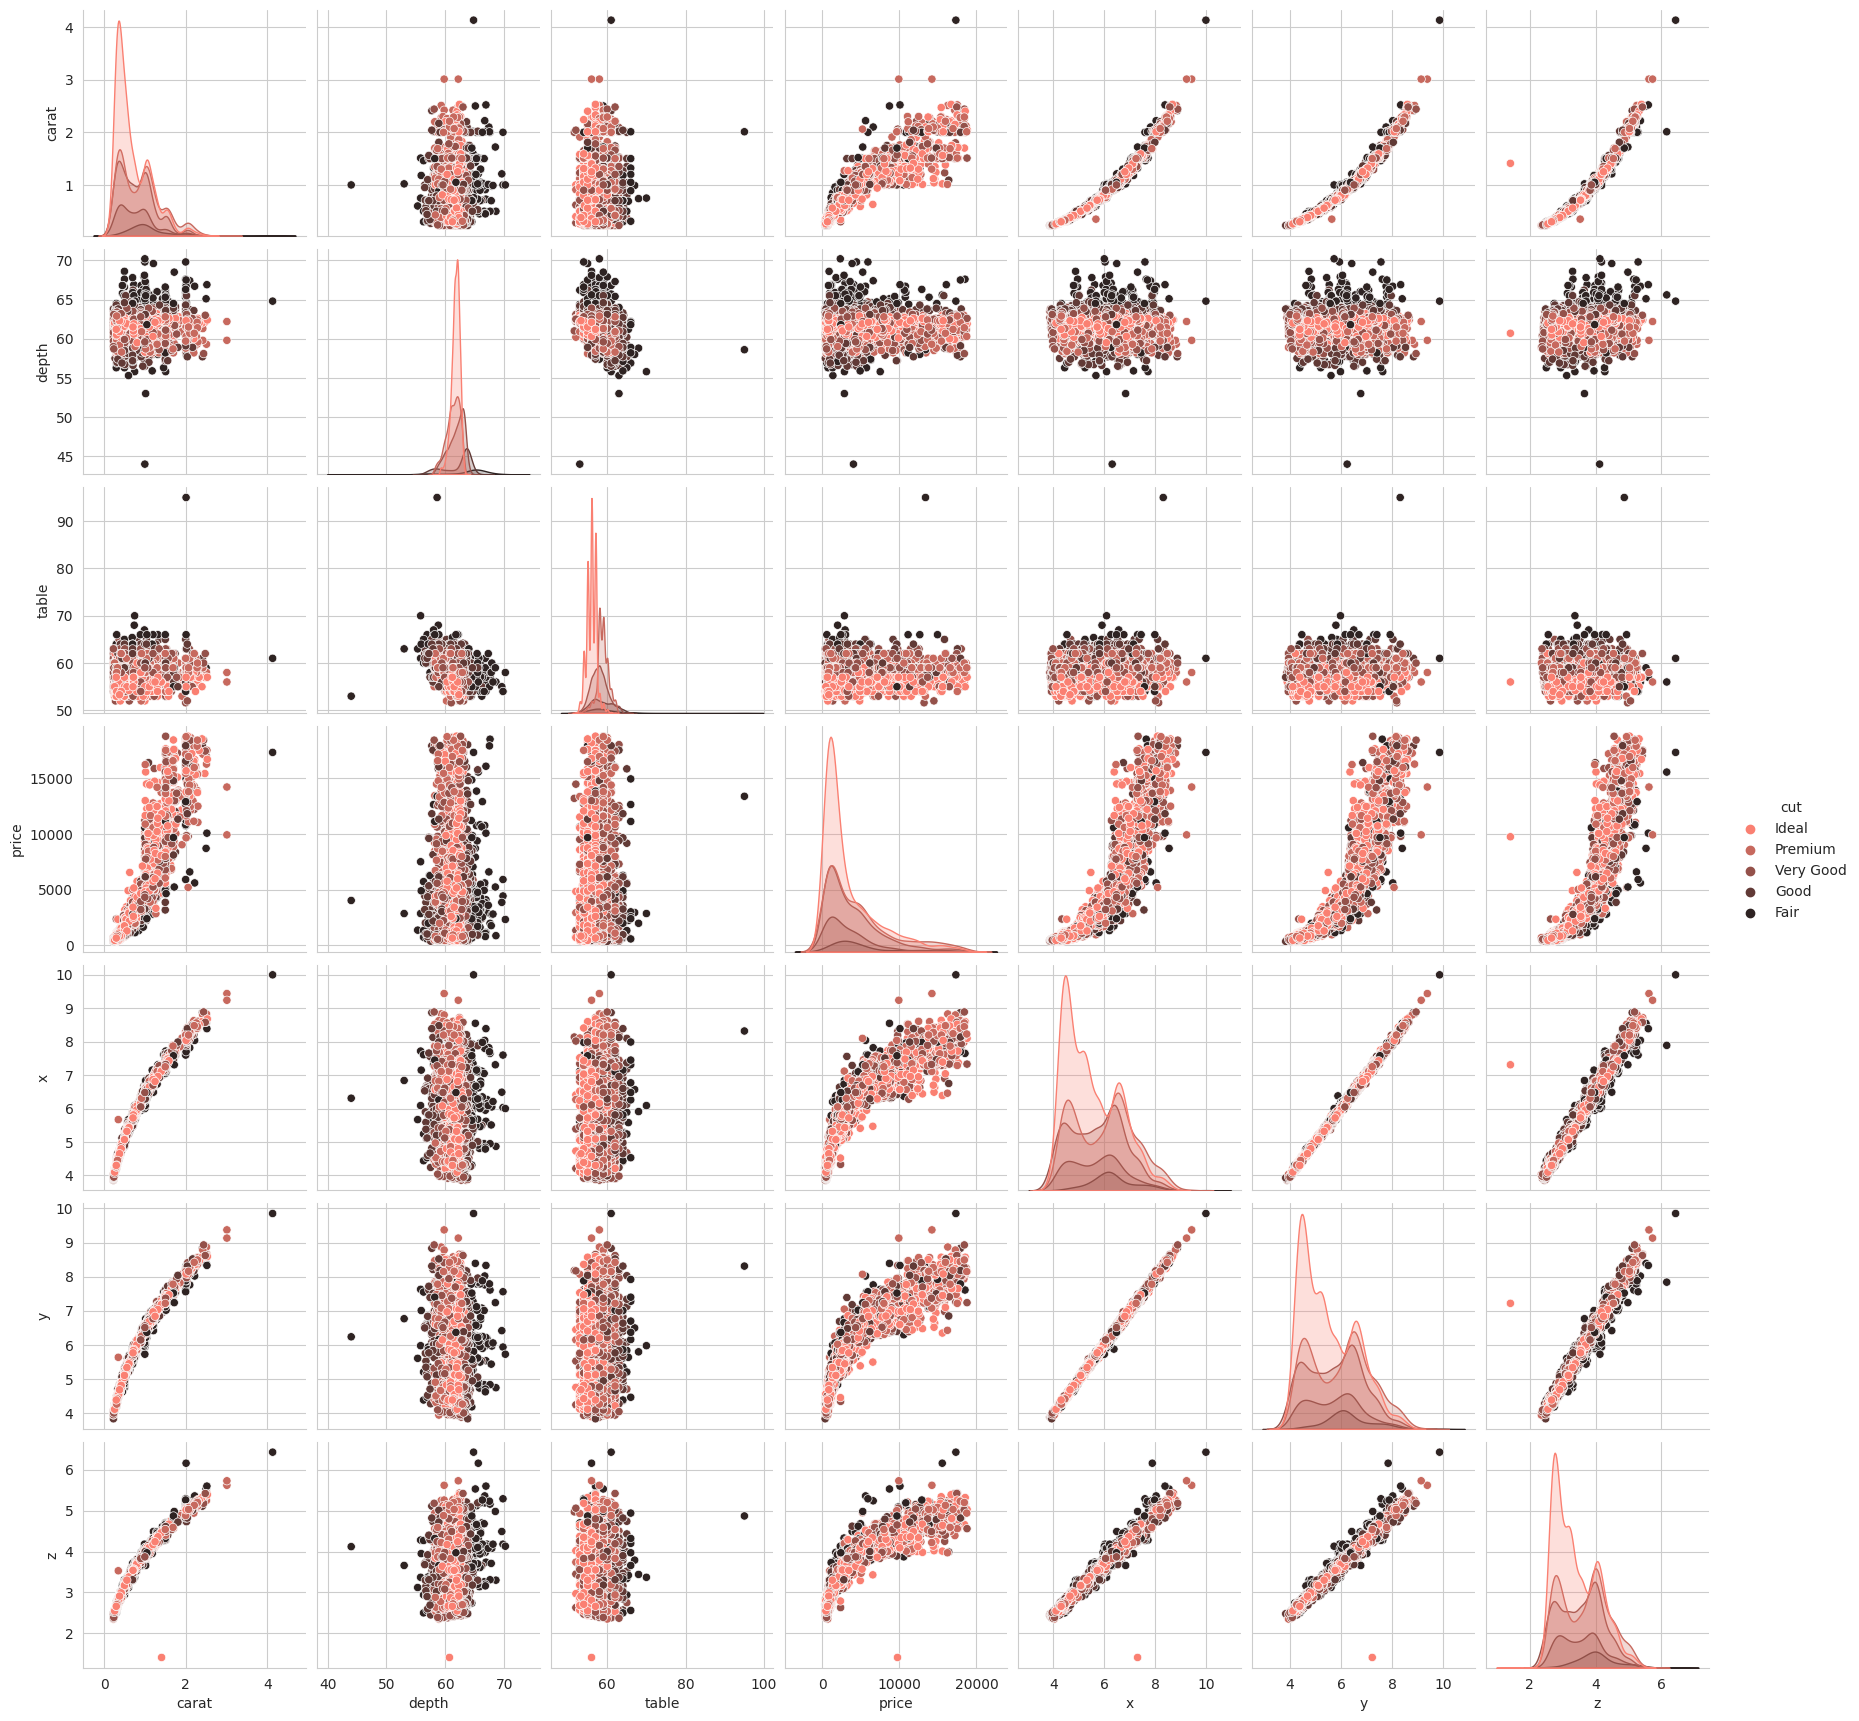

In [184]:
sns.pairplot(data,hue='cut', palette="dark:salmon_r")

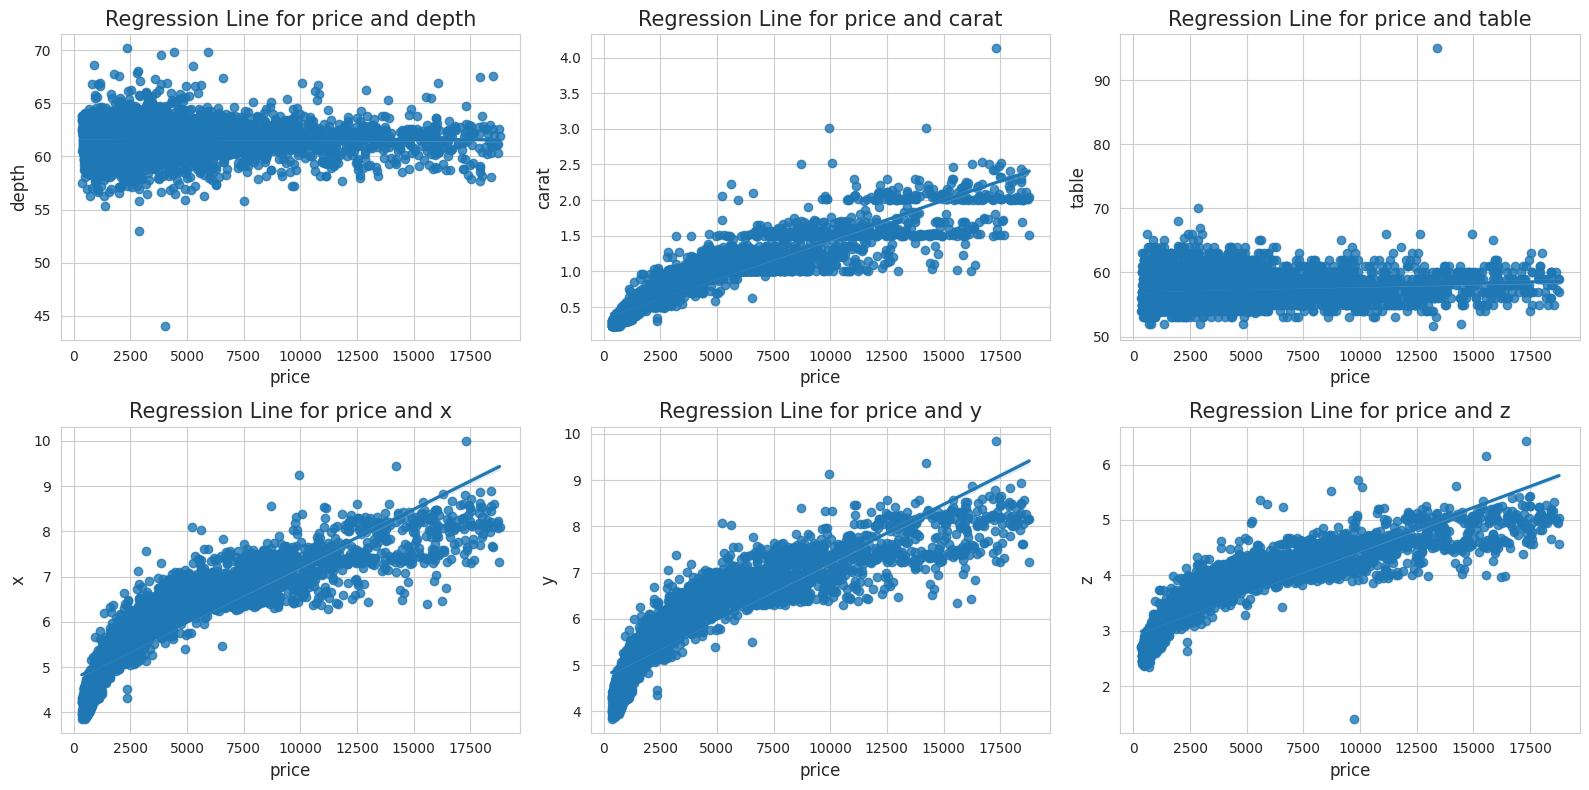

In [185]:
# Assuming 'data' is your dataset and you want to create regression lines for 'price', 'depth', 'carat', 'table', 'x', and 'y' variables
sns.set_style("whitegrid")

# Define the x variable
x_variable = 'price'

# Define the list of y variables
y_variables = ['depth', 'carat', 'table','x','y','z']

# Create subplots with two rows and three columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

# Iterate over each y variable
for i, y_var in enumerate(y_variables):
    # Calculate row and column indices
    row_index = i // 3
    col_index = i % 3
    
    # Create regplot for each y variable
    sns.regplot(x=x_variable, y=y_var, data=data, ax=axes[row_index, col_index])
    
    # Set title for each subplot
    axes[row_index, col_index].set_title(f'Regression Line for {x_variable} and {y_var}', fontsize=15)
    axes[row_index, col_index].set_xlabel(x_variable, fontsize=12)
    axes[row_index, col_index].set_ylabel(y_var, fontsize=12)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [186]:
#Dropping the outliers. 
data = data[(data["depth"]<75)&(data["depth"]>50)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["z"]>2)]
data.shape

(4986, 10)

#### Categorical Features 

Regarding categorical features, such as cut, color and clarity, one can make boxplots to see the distribution of prices and based on that recognize the presence of a trend.

Text(0.5, 1.0, 'Diamond prices based on the clarity')

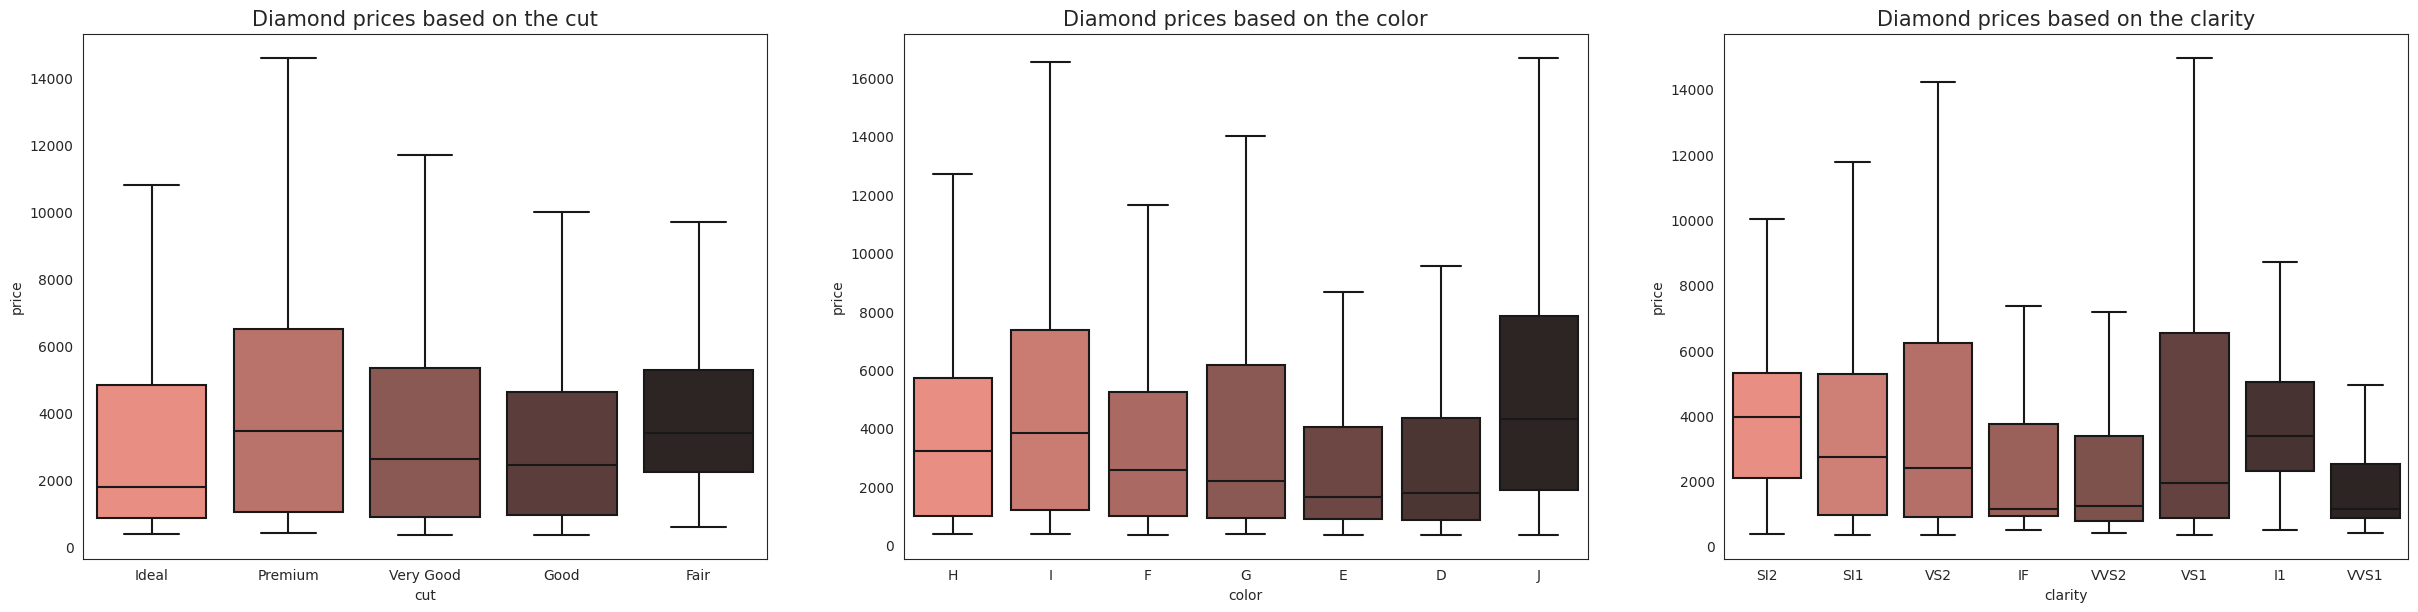

In [187]:
plt.figure(figsize=(30,15))

sns.set_style("white")
plt.subplot(2,3,1)
sns.boxplot(data=data, y=data['price'], x=data['cut'],showfliers=False, palette="dark:salmon_r").set_title("Diamond prices based on the cut",fontsize=15)

sns.set_style("white")
plt.subplot(2,3,2)
sns.boxplot(data=data, y=data['price'], x=data['color'],showfliers=False,palette="dark:salmon_r").set_title("Diamond prices based on the color",fontsize=15)

sns.set_style("white")
plt.subplot(2,3,3)
sns.boxplot(data=data, y=data['price'], x=data['clarity'],showfliers=False, palette="dark:salmon_r").set_title("Diamond prices based on the clarity",fontsize=15)

In [188]:
display(data)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82
...,...,...,...,...,...,...,...,...,...,...
4995,0.38,Ideal,H,VVS2,62.3,53.3,832,4.65,4.69,2.91
4996,0.33,Premium,G,VVS2,61.3,59.0,927,4.45,4.42,2.72
4997,1.25,Ideal,J,VVS2,62.1,56.0,5980,6.81,6.84,4.24
4998,0.31,Premium,F,VS2,62.9,58.0,802,4.31,4.27,2.70


One Hot Encoding for categorical features 

In [189]:
# Get list of categorical variables
s = (data.dtypes =="object")
object_cols = list(s[s].index)
object_cols

['cut', 'color', 'clarity']

In [190]:
for col in object_cols:
    print(data[col].unique())

['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
['H' 'I' 'F' 'G' 'E' 'D' 'J']
['SI2' 'SI1' 'VS2' 'IF' 'VVS2' 'VS1' 'I1' 'VVS1']


In [191]:
data_one=data.copy()

In [192]:
dummy_cut = pd.get_dummies(data_one['cut'])
dummy_color = pd.get_dummies(data_one['color'])
dummy_clarity = pd.get_dummies(data_one['clarity'])

In [193]:
data_one = pd.merge(left=data_one, right=dummy_cut, left_index=True, right_index=True)
data_one = pd.merge(left=data_one, right=dummy_color, left_index=True, right_index=True)
data_one = pd.merge(left=data_one, right=dummy_clarity, left_index=True, right_index=True)

data_one=data_one.drop(columns=['cut']) 
data_one=data_one.drop(columns=['color'])
data_one=data_one.drop(columns=['clarity'])

In [194]:
display(data_one)

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,1.10,62.0,55.0,4733,6.61,6.65,4.11,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1.29,62.6,56.0,6424,6.96,6.93,4.35,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1.20,61.1,58.0,5510,6.88,6.80,4.18,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1.50,60.9,56.0,8770,7.43,7.36,4.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0.90,61.7,57.0,4493,6.17,6.21,3.82,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.38,62.3,53.3,832,4.65,4.69,2.91,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4996,0.33,61.3,59.0,927,4.45,4.42,2.72,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4997,1.25,62.1,56.0,5980,6.81,6.84,4.24,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4998,0.31,62.9,58.0,802,4.31,4.27,2.70,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [203]:
columns_to_scale  = ['carat', 'depth','table','x','y','z']

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse_output=False)

# Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(data[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(data[object_cols])

# Concatenate (Column-Bind) Processed Columns Back Together
processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)

In [205]:
processed_data.shape

(4986, 26)

In [206]:
processed_data[0]

array([ 0.65493468,  0.20010068, -1.1111956 ,  0.79303271,  0.83179665,
        0.83809676,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

### ML model 

In [207]:
X= processed_data
y= np.array(data["price"])
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [210]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [211]:
print(model.intercept_)
print(model.coef_)

3395.2352508823274
[ 5272.7343959    142.88275626   -68.60218482 -1208.84838122
  1894.89186052 -1855.72257171  -452.55518631    25.15844495
   210.76183848   205.86934081    10.76556208   860.04513413
   598.76376762   587.80768385   280.11409444  -235.0735994
  -609.75430975 -1481.90277089 -4029.28314796  1679.52782065
  -158.09890818 -1105.76558189   799.18608323   450.50071449
  1163.68497616  1200.24804351]


In [213]:
y_pred = model.predict(X_test)

In [215]:
print("R^2:",metrics.r2_score(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

R^2: 0.9257428662223955
MAE: 733.623097077714
MSE: 1150083.0873598016
